**Goodwin Model Simulation
In the following, we set up a basic Goodwin model, involving endogenous cycles created by class struggle. 
The mechanism is driven by the following:
- Increasing employmentleads to fewer workers available, thus a lower labour-supply
- Lower labour-supply leads to higher wages
- Higher wages drives profit down
- Lower profits forces firms/capital owners to lay off their workforce, decreasing employment, reducing wages
- Reduced wages will again increase the labor-demand.


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sympy import symbols, Eq, solve

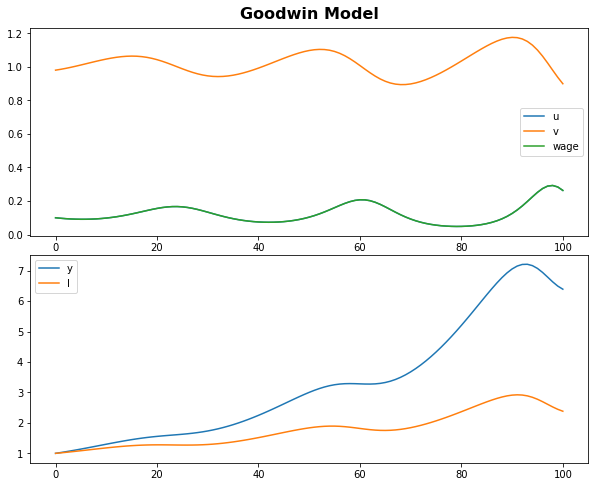

In [35]:
a = 1 #Arbejdskraftsproduktivitet
l = 1 #Antal arbejdere
k = 1 #kapitalinput
sigma = 1 #Kapital-output
beta = 0.01 #befolkningsvækst/n
alpha = 0.01 #Vækst i arbejdskraftsproduktivitet
delta = 0.2 #Depreciation
s= 0.25 #Opsparingsrate
rho = 1 #philips-hældning ml. lønvækst og vækst i beskæftigelse
gamma = 1 #konstant, negativt korreleret med lønvækst

simstørrelse = 100

#Defining functions:
def v(s,u_t,sigma,alpha,beta,delta,v_t):
    v_t1 = v_t*((s*(1-u_t))/sigma - alpha - beta - delta) + v_t
    return v_t1

def u(rho,v_t,gamma,alpha,u_t):
    u_t1 = u_t*(rho*v_t - gamma - alpha) + u_t
    return u_t1

#Setting first values:
v_list = [0.98]
u_list = [0.1]
y_list = [a*l]
l_list = [l]
wage_list = [a*u_list[0]]

#Solving the model:
for i in range(0,simstørrelse):
    v_t1, u_t1 = symbols('v_t1 u_t1')
    eq1 = Eq(v_list[i]*((s*(1-u_list[i]))/sigma - alpha - beta - delta) + v_list[i] - v_t1)
    eq2 = Eq(u_list[i]*(rho*v_list[i] - gamma - alpha) + u_list[i] - u_t1)

    løsning = solve((eq1,eq2), (v_t1,u_t1))

    v_list.append(løsning[v_t1])
    u_list.append(løsning[u_t1])
    y_list.append((1+s*(1-løsning[u_t1])*(1/sigma)-delta)*y_list[i])
    l_list.append((1+s*(1-løsning[u_t1])*(1/sigma)-delta-alpha)*l_list[i])
    wage_list.append(a*løsning[u_t1])
    




#Figurel_list.append((1+s*(1-løsning[u_t1])*(1/sigma)-delta-alpha)*l_list[i]):
fig = plt.figure(figsize=(10,8), frameon=False)
title_font = {'size':'16', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'}
plt.title('Goodwin Model',**title_font)
plt.axis('off')


ax = fig.add_subplot(4,1,(1,2))
plt.plot(u_list, label='u')
plt.plot(v_list, label='v')
plt.plot(wage_list, label='wage')
plt.legend()


#Laver figur 2:
ax = fig.add_subplot(4,1,(3,4))
plt.plot(y_list, label='y')
plt.plot(l_list, label='l')
plt.legend()
